In [ ]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 578.0 MB 16 kB/s 
     |████████████████████████████████| 511.8 MB 9.6 kB/s 


In [ ]:
!pip list

Package                       Version
----------------------------- ----------------------
absl-py                       1.3.0
aeppl                         0.0.33
aesara                        2.7.9
aiohttp                       3.8.3
aiosignal                     1.3.1
alabaster                     0.7.12
albumentations                1.2.1
altair                        4.2.0
appdirs                       1.4.4
arviz                         0.12.1
astor                         0.8.1
astropy                       4.3.1
astunparse                    1.6.3
async-timeout                 4.0.2
asynctest                     0.13.0
atari-py                      0.2.9
atomicwrites                  1.4.1
attrs                         22.1.0
audioread                     3.0.0
autograd                      1.5
Babel                         2.11.0
backcall                      0.2.0
beautifulsoup4                4.6.3
bleach                        5.0.1
blis                          0.7.9
bokeh

In [ ]:
import tensorflow as tf
import os

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')

In [ ]:
len(gpus)

1

In [ ]:
gpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [ ]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
  tf.config.experimental.set_memory_growth(gpu, True)

In [ ]:
import cv2
import imghdr
from matplotlib import pyplot as plt

In [ ]:
data_dir = '/content/drive/MyDrive/training_data/data'

In [ ]:
os.listdir(data_dir)

['sad_people', 'happy_people']

In [ ]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']

In [ ]:
img = cv2.imread('/content/drive/MyDrive/training_data/data/happy_people/05-12-21-happy-people.jpg')

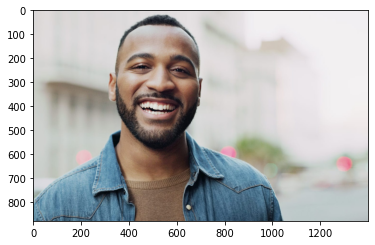

In [ ]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_RGB2BGR))
plt.show()

In [ ]:
#eliminar imagenes dudosas tomando el formato como referencia
for image_class in os.listdir(data_dir):
  for image in os.listdir(os.path.join(data_dir, image_class)):
    image_path = os.path.join(data_dir, image_class, image)
    try:
      img = image_path
      tip = imghdr.what(img)
      if tip not in image_exts:
        print('Image not in ext list {}'.format(image_path))
        os.remove(image_path)
    except Exception as e:
      print('Issue with image {}'.format(image_path))   


In [ ]:
tf.data.Dataset??

In [ ]:
import numpy as np

In [ ]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 171 files belonging to 2 classes.


In [ ]:
#configurando un iterador
data_iterator = data.as_numpy_iterator()

In [ ]:
#obteniendo un grupo del iterador
batch = data_iterator.next()

In [ ]:
batch[0].shape

(32, 256, 256, 3)

In [ ]:
#class 0 = happy people
#class 1 = sad peoble
batch[1]

array([1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0], dtype=int32)

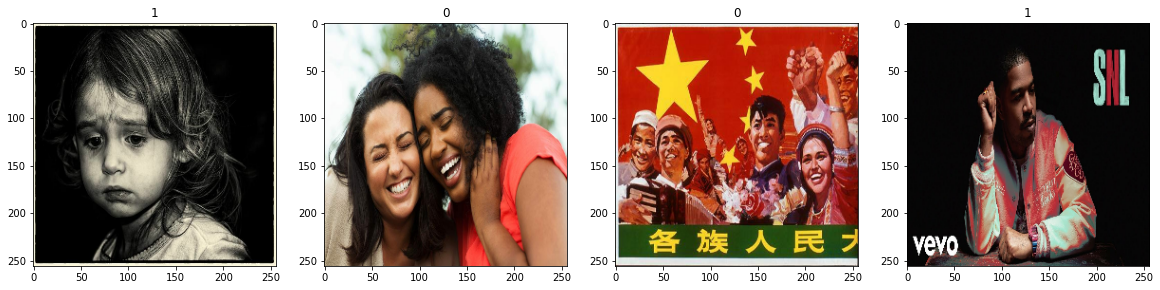

In [ ]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
  ax[idx].imshow(img.astype(int))
  ax[idx].title.set_text(batch[1][idx])

# Scaling

In [ ]:
data = data.map(lambda x, y: (x/255, y))

In [ ]:
scaled_iterator = data.as_numpy_iterator()

In [ ]:
batch = scaled_iterator.next()

In [ ]:
batch[0].min()

0.0

In [ ]:
len(data)

6

In [ ]:
train_size = int(len(data)*.6)
val_size = int(len(data)*.3)+1
test_size = int(len(data)*.1)+1

In [ ]:
train_size+val_size+test_size

6

In [ ]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [ ]:
len(test)

1

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 16)      2320      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 16)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        2320      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

# **Train Model**

In [ ]:
logdir = 'logs'

In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 4s 954ms/step - loss: 0.8463 - accuracy: 0.5312 - val_loss: 0.7331 - val_accuracy: 0.4531
Epoch 2/20
3/3 [==============================] - 4s 1s/step - loss: 0.7072 - accuracy: 0.5729 - val_loss: 0.6424 - val_accuracy: 0.5625
Epoch 3/20
3/3 [==============================] - 4s 931ms/step - loss: 0.6236 - accuracy: 0.5833 - val_loss: 0.6090 - val_accuracy: 0.6094
Epoch 4/20
3/3 [==============================] - 5s 1s/step - loss: 0.6147 - accuracy: 0.6771 - val_loss: 0.5467 - val_accuracy: 0.7969
Epoch 5/20
3/3 [==============================] - 4s 1s/step - loss: 0.5552 - accuracy: 0.6875 - val_loss: 0.5529 - val_accuracy: 0.7031
Epoch 6/20
3/3 [==============================] - 4s 1s/step - loss: 0.4988 - accuracy: 0.8229 - val_loss: 0.4394 - val_accuracy: 0.8594
Epoch 7/20
3/3 [==============================] - 4s 1s/step - loss: 0.4197 - accuracy: 0.8438 - val_loss: 0.3380 - val_accuracy: 0.9062
Epoch 8/20
3/3 [===================

In [ ]:
hist.history

{'loss': [0.8463450074195862,
  0.7072299122810364,
  0.6236004829406738,
  0.6146599650382996,
  0.5551814436912537,
  0.4988151490688324,
  0.4197361469268799,
  0.3801816403865814,
  0.45275697112083435,
  0.2811087369918823,
  0.27383726835250854,
  0.3215617835521698,
  0.22155849635601044,
  0.17385269701480865,
  0.17682260274887085,
  0.11720404028892517,
  0.10594000667333603,
  0.08007226884365082,
  0.03820899501442909,
  0.03794637694954872],
 'accuracy': [0.53125,
  0.5729166865348816,
  0.5833333134651184,
  0.6770833134651184,
  0.6875,
  0.8229166865348816,
  0.84375,
  0.875,
  0.78125,
  0.8958333134651184,
  0.9583333134651184,
  0.8645833134651184,
  0.9479166865348816,
  0.9583333134651184,
  0.9375,
  0.9791666865348816,
  0.9895833134651184,
  1.0,
  1.0,
  0.9895833134651184],
 'val_loss': [0.7330577373504639,
  0.6423743963241577,
  0.6090229749679565,
  0.5466523170471191,
  0.5528877973556519,
  0.43935561180114746,
  0.3380071818828583,
  0.5063851475715637,

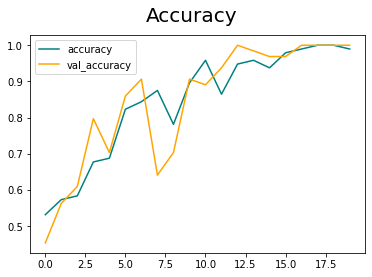

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()


In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [ ]:
pre =Precision()
re =Recall()
acc =BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
  X, y = batch
  yhat = model.predict(X)
  pre.update_state(y, yhat)
  re.update_state(y, yhat)
  acc.update_state(y, yhat)

1/1 [==============================] - 0s 66ms/step


In [ ]:
print(f'Precision: {pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy{acc.result().numpy()}')

Precision: 1.0, Recall:1.0, Accuracy1.0


In [ ]:
import cv2

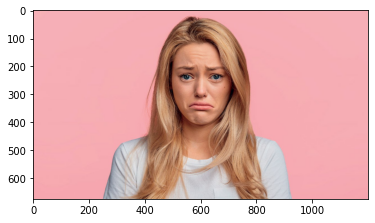

In [ ]:
img_test = cv2.imread('/content/persona_triste.jpg')
plt.imshow(cv2.cvtColor(img_test, cv2.COLOR_BGR2RGB))
plt.show()

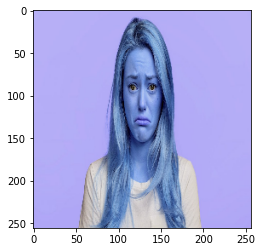

In [ ]:
resize = tf.image.resize(img_test, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
resize.shape

TensorShape([256, 256, 3])

In [ ]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat

1/1 [==============================] - 0s 17ms/step


array([[0.8738265]], dtype=float32)

In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad with {yhat}%')
else:
  print(f'Predicted class is happy with {yhat}%')

Predicted class is Sad with [[0.8738265]]%


# **Save model**

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
new_model = load_model(os.path.join('models', 'happysadmodel.h5'))

In [ ]:
yhatnew = new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 137ms/step


In [ ]:
if yhat > 0.5:
  print(f'Predicted class is Sad with {yhat}%')
else:
  print(f'Predicted class is happy with {yhat}%')

Predicted class is Sad with [[0.8738265]]%
